# Math 761 HW 6: MCMC, Gibbs Sampler, MH

### Exercise 1

Cosider a scenario where 16 people stand in a  4x4 grid $\textbf{X}$ and the Covid status of each person is recorded. One random instance of $\textbf{X}$ is shown below: 

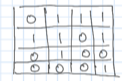
where the person in the $ith$ row and $jth$ column  is 

$$
X_{i, j} = 
\begin{cases}
0 & \text{ if they don't have Covid19}\\
1 & \text{ if they have Covid19}
\end{cases}
$$

and the configuration of the grid is determined by the probability model

$$
P\{H(\textbf{X}) = h\} = \frac{e^{\beta h}}{NC},
$$

where $\beta>0$ is a constant; $NC$ is a normalizing constant that makes the total probability sum to 1; and $H(\textbf{X}) = h$ is the sum of number of neighbors each person has (up, down, left, right) that share the same health status. If a person is on an edge or corner, then they may not have some of these neighbors. In the example of
$\textbf{X}$ shown above, $h(\textbf{X}) = 24$ because

| $X_{i,j}$    | Number of same-status neighbors |
|-------------|---------------------------------|
| $X_{1,1}$   | 0                               |
| $X_{1,2}$   | 2                               |
| $X_{1,3}$   | 2                               |
| $X_{1,4}$   | 2                               |
| $X_{2,1}$   | 1                               |
| $X_{2,2}$   | 3                               |
| $X_{2,3}$   | 1                               |
| $X_{2,4}$   | 1                               |
| $X_{3,1}$   | 1                               |
| $X_{3,2}$   | 1                               |
| $X_{3,3}$   | 3                               |
| $X_{3,4}$   | 1                               |
| $X_{4,1}$   | 2                               |
| $X_{4,2}$   | 2                               |
| $X_{4,3}$   | 2                               |
| $X_{4,4}$   | 0                               |
| $sum$ | 24                              |

To be extra clear, we get the numbers in the table like so:  the person in the 2nd row and 3rd column is $X_{2,3}$ and has status 0. If we look above, below, left, and right (exclude diagonals) of this person, there is only one other person who shares the same Covid status of 0 ($X_{3,3}$). Therefore the number of same-status neighbors $X_{2,3}$ is 1. We tally up the same-status neighbors for each person in the grid and that value is  $h(\bf{X})$.

Now our goal is to estimate $P\{H(\textbf{X})\leq 11\}.$ You can probably tell that it is difficult to generate a bunch of 4x4 grids $\textbf{X}$ directly in order to then calculate what proportion of times $H({X})$ is less than 11. So we will use Gibbs sampling instead to swap between {0,1} status for each person $X_{i,j}$ in turn.


a) First, figure out what the conditional probability is for any $X_{i,j}$ to be 0 or 1 by finding the conditional probability of $P\{H(\textbf{X})=h|X_{-i,-j}\}$, where the given $X_{-i,-j}$ represents the fixed covid-statuses of everyone except the (i,j)th person. Hint: $h$ can only take on two different values, and you should use Bayes theorem.


b) Create a deterministic Gibbs sampler using a burn-in of 1000 and $\beta=1/4$. For your results, try to estimate  $P\{H(\textbf{X})\leq 11\};$  $P\{H(\textbf{X})\leq 15\}$ ; and  $P\{H(\textbf{X})\leq 20\}$ using 50 replications of your MCMC code. Report in one table the mean and se for each estimate over the 50 replications. (Thank you!)

**Solution**
 
 a) $X_{i,j}$ can be 0 or 1, thus $h$ can be one of only two values, $h_0, h_1$. Then we can find the $P\{H(\textbf{X})=h_0|X_{-i,-j}\}$ and $P\{H(\textbf{X})=h_1|X_{-i,-j}\}$. First using Bayes theorem, we can solve for the $h_0$ case:

$$P\{H(\textbf{X})=h_0|X_{-i,-j}\} = \frac{P\{H(\textbf{X})=h_0, X_{-i,-j}\}}{P(X_{-i,-j})}$$
$$ = \frac{P\{H(\textbf{X})=h_0, X_{-i,-j}\}}{P\{H(\textbf{X})=h_0, X_{-i,-j}\} + P\{H(\textbf{X})=h_1, X_{-i,-j}\} }$$
$$ = \frac{P\{H(\textbf{X})=h_0\}}{P\{H(\textbf{X})=h_0\} + P\{H(\textbf{X})=h_1\} }$$
Using $P\{H(\textbf{X}) = h\} = \frac{e^{\beta h}}{NC}$, this simplifies to:
$$ = \frac{\frac{e^{\beta h_0}}{NC}}{\frac{e^{\beta h_0}}{NC} + \frac{e^{\beta h_1}}{NC} }$$
Finally, the normalizing constant cancels out to get:
$$P\{H(\textbf{X})=h_0|X_{-i,-j}\}  = \frac{e^{\beta h_0}}{e^{\beta h_0}+e^{\beta h_1}}$$

Using the same process, we also get that:
$$P\{H(\textbf{X})=h_1|X_{-i,-j}\}  = \frac{e^{\beta h_1}}{e^{\beta h_0}+e^{\beta h_1}}$$

 b) To estimate $P\{H(\textbf{X})\leq h_i\};$, we can calculate the proportion of samples that are less than $h_i$. The resulting estimates of $P\{H(\textbf{X})\leq 11\};$  $P\{H(\textbf{X})\leq 15\}$ ; and  $P\{H(\textbf{X})\leq 20\}$ are shown in the dataframe below. All probabilities are quite low, indicating $H(\textbf{X})$ is usually greater than 20.

In [3]:
beta = 1/4

h = function(m){
    x_max = nrow(m)
    y_max = ncol(m)
    n = 0
    for (i in 1:x_max){
        for (j in 1:y_max){
            last_state = m[i, j]
            if (i<x_max){
                # check down
                n = n +(last_state == m[i + 1, j])
            }
            if (i > 1) {
                # check up
                n = n +(last_state == m[i - 1, j])
            }
            if (j<y_max){
                # check right
                n = n +(last_state == m[i, j+1])
            }
            if (j>1) {
                # check left
                n = n +(last_state == m[i, j-1])
            }
        }
    }
    return(n)
}

gibbs_step = function(current_x){
    for(i in 1:nrow(current_x)){
        for (j in 1:ncol(current_x)){
            current_x[i,j] = 0
            alt_x = current_x
            alt_x[i,j] = 1
            u = runif(1)
            if (u > exp(beta*h(current_x))/(exp(beta*h(current_x))+exp(beta*h(alt_x)))){
                current_x = alt_x
            }
        }
    }
    return(current_x)
}

In [4]:
# Gibbs sampler
n = 50
p_11 = rep(NA, n)
p_15 = rep(NA, n)
p_20 = rep(NA, n)
burn_in = 1000
runs = 10*burn_in

for (i in 1:n){
    x0 = matrix(rbinom(16, size = 1, p=0.5), nrow=4)
    current_x = x0
    samples = c()
    for(b in 1:burn_in){
        current_x = gibbs_step(current_x)
    }

    for(r in 1:runs){
        current_x = gibbs_step(current_x)
        samples[r] = h(current_x)
    }
    p_11[i] = sum(samples <= 11)/runs
    p_15[i] = sum(samples <= 15)/runs
    p_20[i] = sum(samples <= 20)/runs
}

means = c(mean(p_11), mean(p_15), mean(p_20))
std_err = c(sd(p_11)/sqrt(runs), sd(p_15)/sqrt(runs), sd(p_20)/sqrt(runs))

data.frame(means, std_err)

means,std_err
<dbl>,<dbl>
0.000074,7.507819e-07
0.000938,2.805898e-06
0.030344,1.646537e-05


### Exercise 2

We can actually use the MH sampler to carry out the sampling in the 4x4 gride model that is equivalent to the random scan Gibbs sampler. For this, use a proposal distribution that uniformly picks 1 amongst all the people on the grid and uniformly chooses a 0 or 1 health status for that person, that is

$$ g(X_{t+1}|X_{t}) = g(X_{t+1}) = \frac{1}{16*2}.
$$

a) Calculate the acceptance probability

b) Then estimate  $P\{H(\textbf{X})\leq 11\};$  $P\{H(\textbf{X})\leq 15\}$ ; and  $P\{H(\textbf{X})\leq 20\}$ using 50 replications of your MCMC code. Report in one table the mean and se for each estimate over the 50 replications.

**Solution**

a) The acceptance probability for MH is given by:

$$\alpha _{x_{t},x_{t+1}} = min(1, \frac{f(x_{t+1})g(x_{t}|x_{t+1})}{f(x_{t})g(x_{t+1}|x_{t})})$$

We are given that the proabaility of picking a person is $ g(X_{t+1}|X_{t}) = g(X_{t+1}) = \frac{1}{16*2}$. Since we are uniformly sampling, $ g(X_{t}|X_{t+1}) = g(X_{t}) = g(X_{t}) = \frac{1}{16*2}$. That is we are equally likely to have chosen the previous person given the next person. Then the acceptance probability simplifies to:

$$\alpha _{x_{t},x_{t+1}} = min(1, \frac{f(x_{t+1})}{f(x_{t})})$$

In this case, $f(X_{t+1}) = \frac{\pi(X_{t+1})}{NC}$ is related to $P\{H({X_{t+1}}) = h_{t+1}\} = \frac{e^{\beta h_{t+1}}}{NC}$, where $\pi(X_{t+1})=e^{\beta h_{t+1}}$. Then the acceptance probability becomes:

$$\alpha _{x_{t},x_{t+1}} = min(1, \frac{e^{\beta h_{t+1}}}{e^{\beta h_{t}}})$$

b) The estimates for $P\{H(\textbf{X})\leq 11\};$  $P\{H(\textbf{X})\leq 15\}$ ; and  $P\{H(\textbf{X})\leq 20\}$ are in the table below. The MH sampler was much faster than the gibbs sampler, and the standard error is comparable for the two samplers for $P\{H(\textbf{X})\leq 15\}$ and  $P\{H(\textbf{X})\leq 20\}$. The gibbs sampler has a smaller standard error for $P\{H(\textbf{X})\leq 11\}$ and may be a better estimator in that scenario. Both estimators provide similar values for the mean.

In [24]:
update = function(X){
    # get proposed next state
    next_state_ind = sample(seq(1,16), 1)
    next_state_value = sample(c(0,1), 1)
    i = ceiling(next_state_ind/4)
    j = (next_state_ind%%4)
    if (j==0){
        j = 4
    }
    # check acceptance criteria
    alt_x = X
    alt_x[i, j] = next_state_value 
    u = runif(1)
    alpha = min(exp(beta*h(alt_x))/exp(beta*h(X)))
    if (u<alpha){
        X[i, j] = next_state_value
    }
    return(X)
}


In [25]:
n = 50
p_11 = rep(NA, n)
p_15 = rep(NA, n)
p_20 = rep(NA, n)
burn_in = 1000
runs = 10*burn_in

for (i in 1:n){
    x0 = matrix(rbinom(16, size = 1, p=0.5), nrow=4)
    current_x = x0
    samples = c()
    for(b in 1:burn_in){
        current_x = update(current_x)
    }

    for(r in 1:runs){
        current_x = update(current_x)
        samples[r] = h(current_x)
    }
    p_11[i] = sum(samples <= 11)/runs
    p_15[i] = sum(samples <= 15)/runs
    p_20[i] = sum(samples <= 20)/runs
}

means = c(mean(p_11), mean(p_15), mean(p_20))
std_err = c(sd(p_11)/sqrt(runs), sd(p_15)/sqrt(runs), sd(p_20)/sqrt(runs))

data.frame(means, std_err)

means,std_err
<dbl>,<dbl>
0.000048,1.417673e-06
0.000996,8.278223e-06
0.030098,5.523142e-05


### Exercise 3

Look at Rizzo Example 9.7 (first edition) or 10.11 (second edition) about generating a bivariate normal distribution with correlation -0.75.

We can instead use the ***random scan*** Gibbs sampler, but there is a question about how the random scan affects the burn in period since we are no longer sampling from both coordinates for each step.

a) Try to implement the random scan Gibbs sampler using the same number of burn-ins and saved runs as in the example, and plot the resulting sample.

b) Then experiment with the random scan using different burn-ins but (10*burn-in) for the number of saved runs. What is the size of the burn-in that you need to get a plot similar to what you get for the deterministic scan?


**Solution**

a) We can use the random scan by randomly sampling which $x \in (x_1, x_2)$ we want to update. Then we update the selected value and the new point becomes the updated value for the selected $x$ and the previous value for the non-selected $x$. For example, if $x_1$ is selected and updated to $x_1^*$, the saved point is $(x_1^*, x_2)$.  The code below has been adapted to do this and the resulting plot below matches the example well.

In [26]:
#initialize constants and parameters
N <- 5000 #length of chain
burn <- 1000 #burn-in length
X <- matrix(0, N, 2) #the chain, a bivariate sample
rho <- -.75 #correlation
mu1 <- 0
mu2 <- 2
sigma1 <- 1
sigma2 <- .5
s1 <- sqrt(1-rho^2)*sigma1
s2 <- sqrt(1-rho^2)*sigma2

###### generate the chain #####
X[1, ] <- c(mu1, mu2) #initialize
for (i in 2:N) {
    # randomly sample ind to update
    update_ind = sample(c(1,2), size=1) 
    freeze_ind = 1 + (update_ind ==1)
    if (update_ind == 1){
        x2 <- X[i-1, 2]
        m1 <- mu1 + rho * (x2 - mu2) * sigma1/sigma2
        X[i, 1] <- rnorm(1, m1, s1)
        X[i, 2] = x2
    } else {
        x1 <- X[i-1, 1]
        m2 <- mu2 + rho * (x1 - mu1) * sigma2/sigma1
        X[i, 2] <- rnorm(1, m2, s2)
        X[i, 1] = x1
    }
}

b <- burn + 1
x <- X[b:N, ]

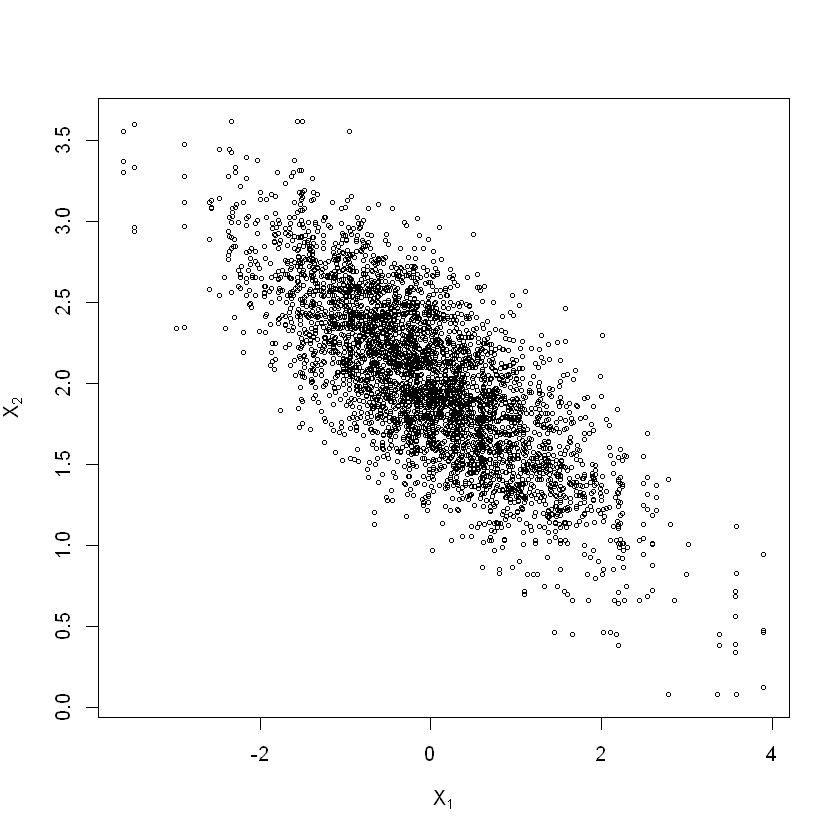

In [27]:
plot(x, main="", cex=.5, xlab=bquote(X[1]),
ylab=bquote(X[2]), ylim=range(x[,2]))

b) burn-in of $b = 10, 50, 100, 250, 500, 1000$ were tested and compared graphically. The graph starts to look like the example around $b=50$, though this could be due to the number of points. To double check, the correlation is calculated for each burn in period. The correlation starts to converge around a burn in of 250, hence the sampling seems to match the figure best with a burn in of 250.

In [28]:
random_scan_mvn = function(burn_in){
    N <- burn_in*10 + burn_in #length of chain
    X <- matrix(0, N, 2) #the chain, a bivariate sample
    rho <- -.75 #correlation
    mu1 <- 0
    mu2 <- 2
    sigma1 <- 1
    sigma2 <- .5
    s1 <- sqrt(1-rho^2)*sigma1
    s2 <- sqrt(1-rho^2)*sigma2
    X[1, ] <- c(mu1, mu2) #initialize
    for (i in 2:N) {
        # randomly sample ind to update
        update_ind = sample(c(1,2), size=1) 
        freeze_ind = 1 + (update_ind ==1)
        if (update_ind == 1){
            x2 <- X[i-1, 2]
            m1 <- mu1 + rho * (x2 - mu2) * sigma1/sigma2
            X[i, 1] <- rnorm(1, m1, s1)
            X[i, 2] = x2
        } else {
            x1 <- X[i-1, 1]
            m2 <- mu2 + rho * (x1 - mu1) * sigma2/sigma1
            X[i, 2] <- rnorm(1, m2, s2)
            X[i, 1] = x1
        }
    }

    b <- burn_in + 1
    x <- X[b:N, ]
    return(x)
}

In [29]:
x_100 = random_scan_mvn(100)
x_10 = random_scan_mvn(10)
x_50 = random_scan_mvn(50)
x_250 = random_scan_mvn(250)
x_1000 = random_scan_mvn(1000)
x_500 = random_scan_mvn(500)

In [30]:
corrs = c(cor(x_10)[1,2], cor(x_50)[1,2], cor(x_100)[1,2], cor(x_250)[1,2], cor(x_500)[1,2], cor(x_1000)[1,2])
labels = c(10, 50, 100, 250, 500, 1000)
data.frame(labels, corrs)

labels,corrs
<dbl>,<dbl>
10,-0.6934682
50,-0.7496557
100,-0.7964889
250,-0.7435852
500,-0.7413666
1000,-0.7477857


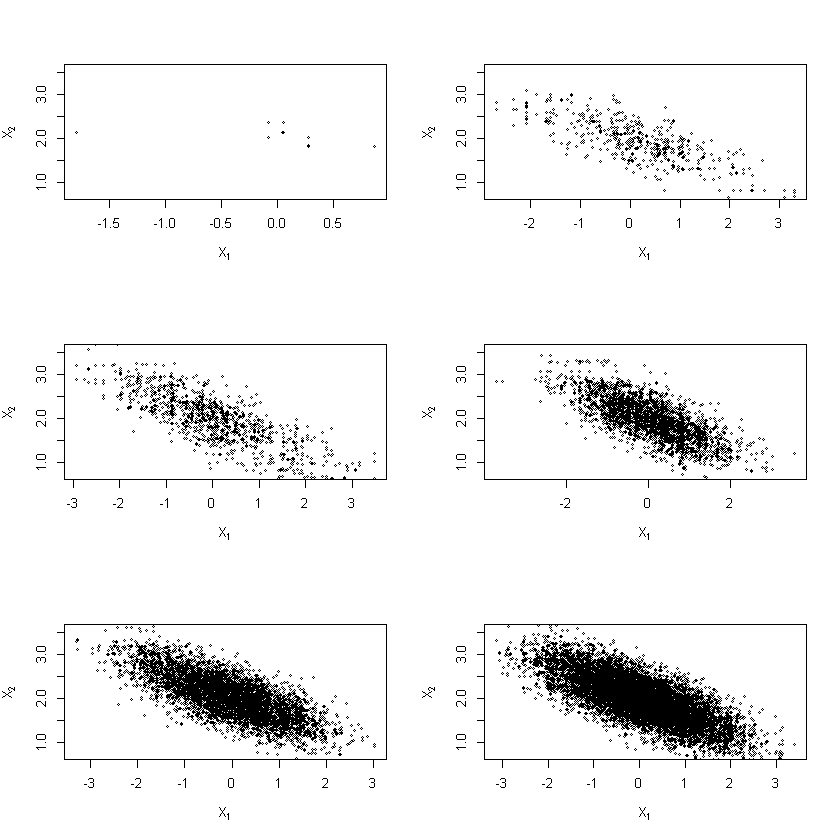

In [43]:
par(mfrow = c(3, 2))
plot(x_10, main="", cex=.5, xlab=bquote(X[1]),
ylab=bquote(X[2]), ylim=range(x[,2]))
plot(x_50, main="", cex=.5, xlab=bquote(X[1]),
ylab=bquote(X[2]), ylim=range(x[,2]))
plot(x_100, main="", cex=.5, xlab=bquote(X[1]),
ylab=bquote(X[2]), ylim=range(x[,2]))
plot(x_250, main="", cex=.5, xlab=bquote(X[1]),
ylab=bquote(X[2]), ylim=range(x[,2]))
plot(x_500, main="", cex=.5, xlab=bquote(X[1]),
ylab=bquote(X[2]), ylim=range(x[,2]))
plot(x_1000, main="", cex=.5, xlab=bquote(X[1]),
ylab=bquote(X[2]), ylim=range(x[,2]))

### Exercise 4

Verify that Gibbs sampling satisfies detailed balance in the sense that sampling from each component conditional on the other components satisfies detailed balance. Without loss of generality, you can assume that we're using the deterministic Gibbs sampler. Please show all your work!

**Solution**

Detailed balance is given by the equation:

$$\pi(x)P(y|x) = \pi(y)P(x|y)$$
In the case of the deterministic gibs sampler, $\pi(x)= P\{H(\textbf{X}) = h_x\} = \frac{e^{\beta h_x}}{NC}$ and $P(y|x) = P\{H(\textbf{X})=h_y|X_{-i,-j}\}  = \frac{e^{\beta h_y}}{e^{\beta h_y}+e^{\beta h_x}}$. Then the detailed balance equation becomes:
$$P\{H(\textbf{X}) = h_x\} P\{H(\textbf{X})=h_y|X_{-i,-j}\} = P\{H(\textbf{X}) = h_y\} P\{H(\textbf{X})=h_x|X_{-i,-j}\}$$
$$\frac{e^{\beta h_x}}{NC}\frac{e^{\beta h_y}}{e^{\beta h_y}+e^{\beta h_x}} = \frac{e^{\beta h_y}}{NC}\frac{e^{\beta h_x}}{e^{\beta h_y}+e^{\beta h_x}} $$

It is clear that the LHS=RHS, hence the deterministic gibbs sampler satisfies the detailed balance equation.